In [1]:
import pandas
import numpy
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn
writebatch = '20211013'

In [2]:
input_df = pandas.read_excel('../data/76 brain input tracing dataset.xlsx',header=1)
input_df['Cre line:'].values

C:\ProgramData\Anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


array(['DAT-Cre', 'DAT-Cre', 'DAT-Cre', 'DAT-Cre', 'DAT-Cre', 'DAT-Cre',
       'DAT-Cre', 'DAT-Cre', 'DAT-Cre', 'DAT-Cre', 'DAT-Cre', 'DAT-Cre',
       'DAT-Cre', 'DAT-Cre', 'DAT-Cre', 'DAT-Cre', 'GAD2-Cre', 'GAD2-Cre',
       'GAD2-Cre', 'GAD2-Cre', 'GAD2-Cre', 'GAD2-Cre', 'GAD2-Cre',
       'GAD2-Cre', 'GAD2-Cre', 'GAD2-Cre', 'GAD2-Cre', 'GAD2-Cre',
       'vGluT2-Cre', 'vGluT2-Cre', 'vGluT2-Cre', 'vGluT2-Cre',
       'vGluT2-Cre', 'vGluT2-Cre', 'vGluT2-Cre', 'vGluT2-Cre',
       'vGluT2-Cre', 'vGluT2-Cre', 'vGluT2-Cre', 'vGluT2-Cre',
       'vGluT2-Cre', 'vGluT2-Cre', 'vGluT2-Cre', 'vGluT2-Cre', 'DAT-Cre',
       'DAT-Cre', 'DAT-Cre', 'DAT-Cre', 'DAT-Cre', 'DAT-Cre', 'DAT-Cre',
       'DAT-Cre', 'GAD2-Cre', 'GAD2-Cre', 'GAD2-Cre', 'GAD2-Cre', nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, 'vGluT2-Cre', 'vGluT2-Cre', 'vGluT2-Cre', 'vGluT2-Cre'],
      dtype=object)

In [3]:
input_df = pandas.read_excel('../data/76 brain input tracing dataset.xlsx',header=1)
input_df = input_df.loc[input_df['Cre line:'] == "DAT-Cre"].reset_index(drop=True)
input_df.head()

,Experimental condition,Cre line:,Output site:,% starter cells that are TH+,total rabies-labeled input cells,Cortex,NAcMed,NAcLat,NAcCore,DStr,...,LH,ZI,DR,LDT,PBN,DCN,XCoordCOM,YCoordCOM,ZCoordCOM,Unnamed: 30
0,cTRIO DAT-CreBLA 3,DAT-Cre,Amygdala,100,1727,1.563405,1.215981,2.779386,1.563405,5.037638,...,5.037638,4.863926,25.883034,0.579039,12.680950,1.215981,1140.648,1228.338000,4.661972,NaN
1,cTRIO DAT-CreBLA 4,DAT-Cre,Amygdala,100,244,2.459016,0.000000,2.459016,0.000000,3.688525,...,15.983607,3.688525,29.508197,0.409836,8.606557,0.409836,1202.733,1113.200000,7.000000,NaN
2,cTRIO DAT-CreBLA 5,DAT-Cre,Amygdala,88,614,0.488599,0.000000,0.000000,0.488599,0.000000,...,7.328990,9.283388,23.941368,0.977199,11.726384,0.325733,1157.273,1219.727000,5.090909,NaN
3,cTRIO DAT-CreBLA 6,DAT-Cre,Amygdala,92,604,4.470199,6.953642,2.980132,1.490066,1.986755,...,8.443709,12.913907,49.668874,0.827815,3.973510,0.993377,1227.500,1163.666667,5.666667,NaN
4,cTRIO DAT-CreNAcLat 1,DAT-Cre,NAcLat,95,36581,8.783248,6.437768,5.330636,8.865258,11.030316,...,6.355758,4.141494,8.291189,0.451054,5.486455,0.923977,1120.353,1221.481000,5.358289,NaN


In [4]:
pandas.set_option('display.max_rows', 500)
input_df[['CeA','Cre line:','Output site:']]

,CeA,Cre line:,Output site:
0,7.122177,DAT-Cre,Amygdala
1,4.918033,DAT-Cre,Amygdala
2,8.794788,DAT-Cre,Amygdala
3,2.980132,DAT-Cre,Amygdala
4,2.156857,DAT-Cre,NAcLat
5,2.498395,DAT-Cre,NAcLat
6,1.929667,DAT-Cre,NAcLat
7,3.788175,DAT-Cre,NAcLat
8,1.548673,DAT-Cre,NAcMed
9,2.619208,DAT-Cre,NAcMed


In [5]:
input_exp_conditions = input_df['Experimental condition'].values.tolist()

In [6]:
input_output_sites = input_df['Output site:'].values.tolist()

In [7]:
exp_metadata={}
for exp_cond in input_exp_conditions:
    #print(exp_cond)
    row=input_df.loc[input_df['Experimental condition']==exp_cond]
    exp_metadata[exp_cond]={}
    exp_metadata[exp_cond]['Cre line']=row['Cre line:'].values[0]
    exp_metadata[exp_cond]['Output site']=row['Output site:'].values[0]
    exp_metadata[exp_cond]['total rabies-labeled input cells']=row['total rabies-labeled input cells'].values[0]
    x=row['XCoordCOM'].values[0]
    y=row['YCoordCOM'].values[0]
    z=row['ZCoordCOM'].values[0]
    exp_metadata[exp_cond]['COM']=(x,y,z)

In [8]:
cols= ['Cortex', 'NAcMed', 'NAcLat', 'NAcCore', 'DStr', 'VP', 'PO', 'Septum',
       'BNST', 'EAM', 'EP', 'Gpe', 'PVH', 'LHb', 'MHb', 'CeA', 'LH', 'ZI',
       'DR', 'LDT', 'PBN', 'DCN']

In [9]:
input_fraction_df = input_df[cols]

In [10]:
input_fraction_df = input_fraction_df.copy().mul(0.01,
                                             axis=0)

In [11]:
input_fraction_df

,Cortex,NAcMed,NAcLat,NAcCore,DStr,VP,PO,Septum,BNST,EAM,...,PVH,LHb,MHb,CeA,LH,ZI,DR,LDT,PBN,DCN
0,0.015634,0.012160,0.027794,0.015634,0.050376,0.076433,0.041691,0.000000,0.015634,0.057325,...,0.024899,0.020845,0.000000,0.071222,0.050376,0.048639,0.258830,0.005790,0.126809,0.012160
1,0.024590,0.000000,0.024590,0.000000,0.036885,0.049180,0.049180,0.000000,0.098361,0.012295,...,0.020492,0.036885,0.000000,0.049180,0.159836,0.036885,0.295082,0.004098,0.086066,0.004098
2,0.004886,0.000000,0.000000,0.004886,0.000000,0.117264,0.024430,0.000000,0.014658,0.053746,...,0.024430,0.014658,0.068404,0.087948,0.073290,0.092834,0.239414,0.009772,0.117264,0.003257
3,0.044702,0.069536,0.029801,0.014901,0.019868,0.268212,0.039735,0.004967,0.094371,0.144040,...,0.033113,0.139073,0.000000,0.029801,0.084437,0.129139,0.496689,0.008278,0.039735,0.009934
4,0.087832,0.064378,0.053306,0.088653,0.110303,0.101446,0.051420,0.011973,0.034936,0.036330,...,0.017577,0.019272,0.005057,0.021569,0.063558,0.041415,0.082912,0.004511,0.054865,0.009240
5,0.044481,0.079330,0.046757,0.104898,0.128714,0.109976,0.055864,0.016637,0.027844,0.038352,...,0.016870,0.015819,0.007238,0.024984,0.071449,0.044831,0.083533,0.009281,0.023291,0.001868
6,0.041124,0.073074,0.081299,0.068487,0.094269,0.115147,0.022460,0.007118,0.022776,0.030369,...,0.012021,0.029103,0.016291,0.019297,0.092529,0.041915,0.108979,0.025202,0.049665,0.005220
7,0.037294,0.051977,0.091621,0.048453,0.059319,0.172083,0.037294,0.007048,0.034064,0.079287,...,0.012334,0.043461,0.010278,0.037882,0.117756,0.054620,0.033771,0.004601,0.021143,0.000196
8,0.014381,0.065265,0.009956,0.013274,0.000000,0.147124,0.070796,0.002212,0.039823,0.036504,...,0.013274,0.057522,0.014381,0.015487,0.100664,0.040929,0.267699,0.007743,0.073009,0.000000
9,0.030222,0.076561,0.009066,0.016118,0.002015,0.144056,0.026192,0.008059,0.021155,0.084621,...,0.012089,0.076561,0.006044,0.026192,0.107790,0.029214,0.262928,0.014775,0.036266,0.001007


In [12]:
output_df = pandas.read_excel('../data/outputdata.xlsx',header=0,index_col=0)
output_df.head()

,NAcMed 1,NAcMed 2,NAcMed 3,NAcMed 4,NAcMed 5,NAcLat 1,NAcLat 2,NAcLat 3,NAcLat 4,Amy 1,Amy 2,Amy 3,Amy 4,mPFC 1,mPFC 2,mPFC 3,mPFC 4,mPFC 5
mPFC,0.001232,0.009739,0.000671,0.001274,0.012869,0.002753,0.000157,0.004865,0.003167,0.085535,0.009953,0.047102,0.128128,0.242967,0.809498,0.449905,0.333380,0.289141
NAcMedS,0.625051,0.551068,0.571964,0.649204,0.504317,0.030190,0.019625,0.052560,0.012824,0.053101,0.093358,0.270010,0.260883,0.090216,0.064694,0.169370,0.084807,0.116325
NAcLatS,0.002748,0.023831,0.014775,0.052297,0.011716,0.132074,0.177527,0.184099,0.353149,0.054746,0.015875,0.069249,0.038840,0.045607,0.012081,0.042555,0.040434,0.135939
NAcCore,0.047216,0.081314,0.089557,0.096039,0.122636,0.112734,0.096428,0.134275,0.091398,0.046651,0.100249,0.030512,0.042206,0.048172,0.016743,0.013716,0.008972,0.146623
DMS,0.147414,0.235601,0.237004,0.002927,0.251404,0.529846,0.589363,0.280288,0.313000,0.115892,0.133556,0.073315,0.075577,0.353251,0.017936,0.094985,0.226753,0.034813


In [13]:
experiments=output_df.columns.tolist()

In [14]:
exp_metadata={}
exp_conds=[]
for exp in experiments:
    #print(exp_cond)
    col=output_df[exp]
    exp_metadata[exp]={}
    exp_cond=exp.split(' ')[0]
    exp_conds.append(exp_cond)
    exp_metadata[exp]['condition']=exp_cond
conds=numpy.unique(exp_conds)

In [15]:
output_df = output_df.transpose()
regions=output_df.columns.tolist()
output_df['condition']=exp_conds
output_df.head()

,mPFC,NAcMedS,NAcLatS,NAcCore,DMS,DLS,VP,Septum,BNST,CeA,condition
NAcMed 1,0.001232,0.625051,0.002748,0.047216,0.147414,0.006388,0.023022,0.140319,0.006195,0.000413,NAcMed
NAcMed 2,0.009739,0.551068,0.023831,0.081314,0.235601,0.001847,0.050591,0.034175,0.011626,0.000209,NAcMed
NAcMed 3,0.000671,0.571964,0.014775,0.089557,0.237004,0.000043,0.017498,0.067076,0.001400,0.000013,NAcMed
NAcMed 4,0.001274,0.649204,0.052297,0.096039,0.002927,0.000270,0.108919,0.036087,0.049197,0.003786,NAcMed
NAcMed 5,0.012869,0.504317,0.011716,0.122636,0.251404,0.001512,0.070794,0.019117,0.004590,0.001045,NAcMed


# zscore for outputs

In [16]:
output_zscores = zscore(output_df[regions].values,axis=0)
output_sites = output_df['condition'].values.tolist()
output_conditions = numpy.unique(output_sites)

In [17]:
numpy.sum(output_zscores[:,0])

-3.3306690738754696e-16

In [18]:
numpy.sum(output_zscores,axis=0)

array([ 1.22124533e-15, -1.66533454e-15,  3.66373598e-15, -9.54791801e-15,
        0.00000000e+00, -7.07767178e-16,  0.00000000e+00,  2.88657986e-15,
        4.71844785e-16, -9.99200722e-16])

In [19]:
output_zscores_df = pandas.DataFrame(output_zscores, columns=regions)
output_zscores_df['condition'] = output_df['condition'].values

In [20]:
output_zscores_df.mean()

mPFC       6.784696e-17
NAcMedS   -9.251859e-17
NAcLatS    2.035409e-16
NAcCore   -5.304399e-16
DMS        0.000000e+00
DLS       -3.932040e-17
VP         0.000000e+00
Septum     1.603655e-16
BNST       2.621360e-17
CeA       -5.551115e-17
dtype: float64

In [21]:
output_condition_zscores = numpy.zeros((len(output_conditions),len(regions)))
for i, condition in enumerate(output_conditions):
    print(condition)
    zs = output_zscores_df.loc[output_zscores_df['condition']==condition][regions].mean()
    output_condition_zscores[i,:] = zs

Amy
NAcLat
NAcMed
mPFC


In [22]:
output_condition_zscores_df = pandas.DataFrame(output_condition_zscores,columns=[f + ' output' for f in regions],index=output_conditions)
output_condition_zscores_df

,mPFC output,NAcMedS output,NAcLatS output,NAcCore output,DMS output,DLS output,VP output,Septum output,BNST output,CeA output
Amy,-0.318130,-0.286847,-0.387232,-0.449747,-0.664162,-0.397530,0.235760,-0.348586,1.733560,1.625052
NAcLat,-0.624439,-0.906261,1.542440,0.842129,1.381071,1.665617,-1.000483,-1.029396,-0.655413,-0.572168
NAcMed,-0.613017,1.524536,-0.659921,0.329350,-0.195495,-0.629004,0.757241,0.195495,-0.579794,-0.570584
mPFC,1.367072,-0.570049,-0.264245,-0.643255,-0.378033,-0.385465,-0.145463,0.906891,-0.282723,-0.271723


# zscore for inputs

In [23]:
input_features = cols
input_df[input_features].head()

,Cortex,NAcMed,NAcLat,NAcCore,DStr,VP,PO,Septum,BNST,EAM,...,PVH,LHb,MHb,CeA,LH,ZI,DR,LDT,PBN,DCN
0,1.563405,1.215981,2.779386,1.563405,5.037638,7.643312,4.169079,0.000000,1.563405,5.732484,...,2.489867,2.084540,0.000000,7.122177,5.037638,4.863926,25.883034,0.579039,12.680950,1.215981
1,2.459016,0.000000,2.459016,0.000000,3.688525,4.918033,4.918033,0.000000,9.836066,1.229508,...,2.049180,3.688525,0.000000,4.918033,15.983607,3.688525,29.508197,0.409836,8.606557,0.409836
2,0.488599,0.000000,0.000000,0.488599,0.000000,11.726384,2.442997,0.000000,1.465798,5.374593,...,2.442997,1.465798,6.840391,8.794788,7.328990,9.283388,23.941368,0.977199,11.726384,0.325733
3,4.470199,6.953642,2.980132,1.490066,1.986755,26.821192,3.973510,0.496689,9.437086,14.403974,...,3.311258,13.907285,0.000000,2.980132,8.443709,12.913907,49.668874,0.827815,3.973510,0.993377
4,8.783248,6.437768,5.330636,8.865258,11.030316,10.144611,5.142014,1.197343,3.493617,3.633034,...,1.757743,1.927230,0.505727,2.156857,6.355758,4.141494,8.291189,0.451054,5.486455,0.923977


In [24]:
input_zscores = zscore(input_df[input_features].values,axis=0)
numpy.sum(input_zscores,axis=0)

array([-4.44089210e-15,  6.43929354e-15, -1.77635684e-15,  0.00000000e+00,
       -2.22044605e-16, -5.32907052e-15, -3.99680289e-15,  5.44009282e-15,
       -2.44249065e-15, -2.38697950e-15,  1.77635684e-15, -5.66213743e-15,
        5.10702591e-15, -8.88178420e-16, -3.10862447e-15,  6.21724894e-15,
        1.13242749e-14,  3.99680289e-15,  3.55271368e-15, -8.88178420e-16,
        1.99840144e-15,  1.99840144e-15])

In [25]:
input_zscores_df = pandas.DataFrame(input_zscores, columns=input_features)
input_zscores_df['condition'] = input_output_sites

In [26]:
input_zscores_df.mean()

Cortex    -2.035409e-16
NAcMed     2.590520e-16
NAcLat    -5.782412e-17
NAcCore   -2.775558e-17
DStr       4.625929e-18
VP        -1.665335e-16
PO        -2.220446e-16
Septum     2.498002e-16
BNST      -9.512067e-17
EAM       -1.156482e-16
EP         4.625929e-17
Gpe       -2.498002e-16
PVH        2.035409e-16
LHb       -6.013708e-17
MHb       -1.480297e-16
CeA        2.359224e-16
LH         4.949744e-16
ZI         1.341519e-16
DR         1.249001e-16
LDT       -4.163336e-17
PBN        3.700743e-17
DCN        1.110223e-16
dtype: float64

In [27]:
input_conditions = numpy.unique(input_output_sites)

In [28]:
input_condition_zscores = numpy.zeros((len(input_conditions),len(input_features)))
for i, condition in enumerate(input_conditions):
    print(condition)
    zs = input_zscores_df.loc[input_zscores_df['condition']==condition][input_features].mean()
    input_condition_zscores[i,:] = zs

Amygdala
NAcLat
NAcMed
mPFC
nan


In [29]:
input_condition_zscores_df = pandas.DataFrame(input_condition_zscores,columns=[f+' input' for f in input_features],index=input_conditions)
input_condition_zscores_df

,Cortex input,NAcMed input,NAcLat input,NAcCore input,DStr input,VP input,PO input,Septum input,BNST input,EAM input,...,PVH input,LHb input,MHb input,CeA input,LH input,ZI input,DR input,LDT input,PBN input,DCN input
Amygdala,-0.440586,-1.176161,-0.454504,-0.858109,-0.502558,0.387054,-0.363506,-0.895009,1.043828,0.609938,...,1.134478,0.262590,0.074914,1.386468,0.184638,1.196355,0.807723,-0.652931,1.211689,0.273629
NAcLat,1.213288,0.516419,1.508480,1.316444,0.667040,0.319391,-0.213229,0.433528,-0.144469,-0.166492,...,-0.387925,-0.690739,-0.333149,-0.442071,-0.027105,-0.186943,-1.055414,-0.181403,-0.625247,-0.285674
NAcMed,-0.472773,0.465966,-0.921543,-0.605406,-0.902408,0.574968,0.677259,0.027508,0.021643,-0.259781,...,-0.938286,0.669330,-0.376643,-0.352796,-0.040353,-0.563549,0.677796,0.247036,-0.707273,-0.701272
mPFC,-0.958661,-0.623355,-0.820767,-0.901682,-0.490629,-0.428614,0.253617,-0.509556,0.216188,0.114478,...,-0.234859,-0.309396,-0.560070,-0.044727,-0.524816,-0.082416,1.161509,-0.171439,-0.038457,-0.620210
nan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# stitch them together

In [30]:
input_condition_zscores_df = input_condition_zscores_df.dropna()
input_condition_zscores_df

,Cortex input,NAcMed input,NAcLat input,NAcCore input,DStr input,VP input,PO input,Septum input,BNST input,EAM input,...,PVH input,LHb input,MHb input,CeA input,LH input,ZI input,DR input,LDT input,PBN input,DCN input
Amygdala,-0.440586,-1.176161,-0.454504,-0.858109,-0.502558,0.387054,-0.363506,-0.895009,1.043828,0.609938,...,1.134478,0.262590,0.074914,1.386468,0.184638,1.196355,0.807723,-0.652931,1.211689,0.273629
NAcLat,1.213288,0.516419,1.508480,1.316444,0.667040,0.319391,-0.213229,0.433528,-0.144469,-0.166492,...,-0.387925,-0.690739,-0.333149,-0.442071,-0.027105,-0.186943,-1.055414,-0.181403,-0.625247,-0.285674
NAcMed,-0.472773,0.465966,-0.921543,-0.605406,-0.902408,0.574968,0.677259,0.027508,0.021643,-0.259781,...,-0.938286,0.669330,-0.376643,-0.352796,-0.040353,-0.563549,0.677796,0.247036,-0.707273,-0.701272
mPFC,-0.958661,-0.623355,-0.820767,-0.901682,-0.490629,-0.428614,0.253617,-0.509556,0.216188,0.114478,...,-0.234859,-0.309396,-0.560070,-0.044727,-0.524816,-0.082416,1.161509,-0.171439,-0.038457,-0.620210


In [31]:
output_idx = output_condition_zscores_df.index.tolist()
output_idx[0] = "Amygdala"
output_condition_zscores_df.index = output_idx
output_condition_zscores_df

,mPFC output,NAcMedS output,NAcLatS output,NAcCore output,DMS output,DLS output,VP output,Septum output,BNST output,CeA output
Amygdala,-0.318130,-0.286847,-0.387232,-0.449747,-0.664162,-0.397530,0.235760,-0.348586,1.733560,1.625052
NAcLat,-0.624439,-0.906261,1.542440,0.842129,1.381071,1.665617,-1.000483,-1.029396,-0.655413,-0.572168
NAcMed,-0.613017,1.524536,-0.659921,0.329350,-0.195495,-0.629004,0.757241,0.195495,-0.579794,-0.570584
mPFC,1.367072,-0.570049,-0.264245,-0.643255,-0.378033,-0.385465,-0.145463,0.906891,-0.282723,-0.271723


In [32]:
full_zscores_df = pandas.concat([input_condition_zscores_df,output_condition_zscores_df],axis=1)

In [33]:
full_zscores_df.sort_values(by=['Amygdala'],axis=1,ascending=False)

,BNST output,CeA output,CeA input,PBN input,ZI input,PVH input,BNST input,DR input,EAM input,VP input,...,DLS output,Cortex input,NAcCore output,NAcLat input,DStr input,LDT input,DMS output,NAcCore input,Septum input,NAcMed input
Amygdala,1.733560,1.625052,1.386468,1.211689,1.196355,1.134478,1.043828,0.807723,0.609938,0.387054,...,-0.397530,-0.440586,-0.449747,-0.454504,-0.502558,-0.652931,-0.664162,-0.858109,-0.895009,-1.176161
NAcLat,-0.655413,-0.572168,-0.442071,-0.625247,-0.186943,-0.387925,-0.144469,-1.055414,-0.166492,0.319391,...,1.665617,1.213288,0.842129,1.508480,0.667040,-0.181403,1.381071,1.316444,0.433528,0.516419
NAcMed,-0.579794,-0.570584,-0.352796,-0.707273,-0.563549,-0.938286,0.021643,0.677796,-0.259781,0.574968,...,-0.629004,-0.472773,0.329350,-0.921543,-0.902408,0.247036,-0.195495,-0.605406,0.027508,0.465966
mPFC,-0.282723,-0.271723,-0.044727,-0.038457,-0.082416,-0.234859,0.216188,1.161509,0.114478,-0.428614,...,-0.385465,-0.958661,-0.643255,-0.820767,-0.490629,-0.171439,-0.378033,-0.901682,-0.509556,-0.623355


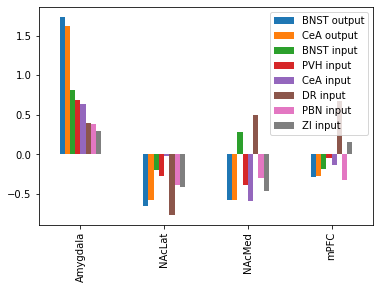

In [71]:
cols = full_zscores_df.sort_values(by=['Amygdala'],axis=1,ascending=False).columns.tolist()[0:8]
full_zscores_df[cols].sort_values(by=['Amygdala'],axis=1,ascending=False).plot.bar()
plt.savefig('../figures/inputs-outputs.amyg.'+writebatch+'.svg')

In [158]:
full_zscores_df.sort_values(by=['Amygdala'],axis=1,ascending=True)

,DMS output,NAcCore input,NAcMed input,NAcCore output,DStr input,LDT input,DLS output,NAcLatS output,Septum output,mPFC output,...,VP output,EAM input,ZI input,PBN input,DR input,CeA input,PVH input,BNST input,CeA output,BNST output
Amygdala,-0.664162,-0.464508,-0.450142,-0.449747,-0.428103,-0.405738,-0.397530,-0.387232,-0.348586,-0.318130,...,0.235760,0.244494,0.300897,0.390029,0.394468,0.636886,0.687781,0.811598,1.625052,1.733560
NAcLat,1.381071,1.128385,0.348341,0.842129,0.927507,-0.318742,1.665617,1.542440,-1.029396,-0.624439,...,-1.000483,-0.029371,-0.405171,-0.388772,-0.759763,-0.023682,-0.277864,-0.201408,-0.572168,-0.655413
NAcMed,-0.195495,-0.447674,0.688141,0.329350,-0.627168,0.809739,-0.629004,-0.659921,0.195495,-0.613017,...,0.757241,-0.118485,-0.462926,-0.294102,0.495683,-0.593635,-0.387674,0.287252,-0.570584,-0.579794
mPFC,-0.378033,-0.545653,-0.415653,-0.643255,-0.539556,0.092142,-0.385465,-0.264245,0.906891,1.367072,...,-0.145463,0.067090,0.153750,-0.325737,0.667990,-0.134681,-0.049629,-0.188151,-0.271723,-0.282723


<AxesSubplot:>

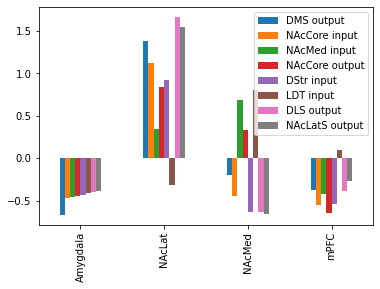

In [178]:
cols = full_zscores_df.sort_values(by=['Amygdala'],axis=1,ascending=True).columns.tolist()[0:8]
full_zscores_df[cols].sort_values(by=['Amygdala'],axis=1,ascending=True).plot.bar()

In [157]:
full_zscores_df.sort_values(by=['NAcLat'],axis=1,ascending=False)

,DLS output,NAcLatS output,DMS output,NAcCore input,DStr input,NAcLat input,NAcCore output,Gpe input,Cortex input,NAcMed input,...,MHb input,PBN input,ZI input,CeA output,mPFC output,BNST output,DR input,NAcMedS output,VP output,Septum output
Amygdala,-0.397530,-0.387232,-0.664162,-0.464508,-0.428103,-0.157146,-0.449747,0.228587,-0.121482,-0.450142,...,-0.141310,0.390029,0.300897,1.625052,-0.318130,1.733560,0.394468,-0.286847,0.235760,-0.348586
NAcLat,1.665617,1.542440,1.381071,1.128385,0.927507,0.908429,0.842129,0.679866,0.526437,0.348341,...,-0.381386,-0.388772,-0.405171,-0.572168,-0.624439,-0.655413,-0.759763,-0.906261,-1.000483,-1.029396
NAcMed,-0.629004,-0.659921,-0.195495,-0.447674,-0.627168,-0.766515,0.329350,-0.971776,-0.437424,0.688141,...,-0.072188,-0.294102,-0.462926,-0.570584,-0.613017,-0.579794,0.495683,1.524536,0.757241,0.195495
mPFC,-0.385465,-0.264245,-0.378033,-0.545653,-0.539556,-0.643404,-0.643255,-0.741342,-0.476880,-0.415653,...,0.056527,-0.325737,0.153750,-0.271723,1.367072,-0.282723,0.667990,-0.570049,-0.145463,0.906891


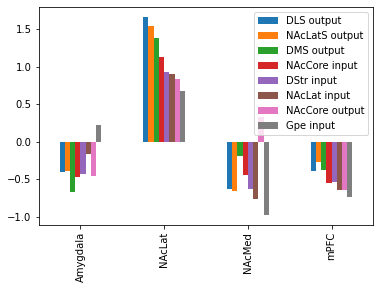

In [72]:
cols = full_zscores_df.sort_values(by=['NAcLat'],axis=1,ascending=False).columns.tolist()[0:8]
full_zscores_df[cols].sort_values(by=['NAcLat'],axis=1,ascending=False).plot.bar()
plt.savefig('../figures/inputs-outputs.NAcLat.'+writebatch+'.svg')

In [159]:
full_zscores_df.sort_values(by=['NAcLat'],axis=1,ascending=True)

,Septum output,VP output,NAcMedS output,DR input,BNST output,mPFC output,CeA output,ZI input,PBN input,MHb input,...,NAcMed input,Cortex input,Gpe input,NAcCore output,NAcLat input,DStr input,NAcCore input,DMS output,NAcLatS output,DLS output
Amygdala,-0.348586,0.235760,-0.286847,0.394468,1.733560,-0.318130,1.625052,0.300897,0.390029,-0.141310,...,-0.450142,-0.121482,0.228587,-0.449747,-0.157146,-0.428103,-0.464508,-0.664162,-0.387232,-0.397530
NAcLat,-1.029396,-1.000483,-0.906261,-0.759763,-0.655413,-0.624439,-0.572168,-0.405171,-0.388772,-0.381386,...,0.348341,0.526437,0.679866,0.842129,0.908429,0.927507,1.128385,1.381071,1.542440,1.665617
NAcMed,0.195495,0.757241,1.524536,0.495683,-0.579794,-0.613017,-0.570584,-0.462926,-0.294102,-0.072188,...,0.688141,-0.437424,-0.971776,0.329350,-0.766515,-0.627168,-0.447674,-0.195495,-0.659921,-0.629004
mPFC,0.906891,-0.145463,-0.570049,0.667990,-0.282723,1.367072,-0.271723,0.153750,-0.325737,0.056527,...,-0.415653,-0.476880,-0.741342,-0.643255,-0.643404,-0.539556,-0.545653,-0.378033,-0.264245,-0.385465


<AxesSubplot:>

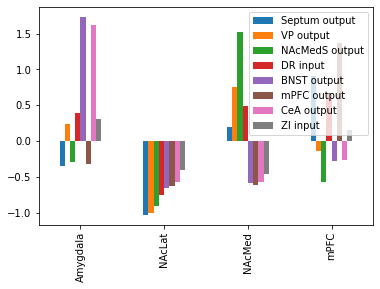

In [182]:
cols = full_zscores_df.sort_values(by=['NAcLat'],axis=1,ascending=True).columns.tolist()[0:8]
full_zscores_df[cols].sort_values(by=['NAcLat'],axis=1,ascending=True).plot.bar()

In [160]:
full_zscores_df.sort_values(by=['NAcMed'],axis=1,ascending=False)

,NAcMedS output,LDT input,VP output,NAcMed input,LHb input,DR input,VP input,NAcCore output,BNST input,LH input,...,EP input,CeA output,BNST output,CeA input,mPFC output,DStr input,DLS output,NAcLatS output,NAcLat input,Gpe input
Amygdala,-0.286847,-0.405738,0.235760,-0.450142,-0.159425,0.394468,0.046033,-0.449747,0.811598,0.180729,...,-0.124920,1.625052,1.733560,0.636886,-0.318130,-0.428103,-0.397530,-0.387232,-0.157146,0.228587
NAcLat,-0.906261,-0.318742,-1.000483,0.348341,-0.331527,-0.759763,-0.091291,0.842129,-0.201408,0.320941,...,0.005404,-0.572168,-0.655413,-0.023682,-0.624439,0.927507,1.665617,1.542440,0.908429,0.679866
NAcMed,1.524536,0.809739,0.757241,0.688141,0.512551,0.495683,0.401081,0.329350,0.287252,0.236837,...,-0.544367,-0.570584,-0.579794,-0.593635,-0.613017,-0.627168,-0.629004,-0.659921,-0.766515,-0.971776
mPFC,-0.570049,0.092142,-0.145463,-0.415653,0.039115,0.667990,0.244517,-0.643255,-0.188151,-0.357840,...,0.021274,-0.271723,-0.282723,-0.134681,1.367072,-0.539556,-0.385465,-0.264245,-0.643404,-0.741342


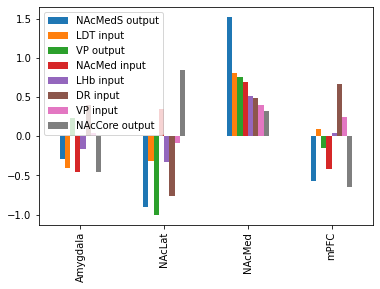

In [73]:
cols = full_zscores_df.sort_values(by=['NAcMed'],axis=1,ascending=False).columns.tolist()[0:8]
full_zscores_df[cols].sort_values(by=['NAcMed'],axis=1,ascending=False).plot.bar()
plt.savefig('../figures/inputs-outputs.NAcMed.'+writebatch+'.svg')

In [161]:
full_zscores_df.sort_values(by=['NAcMed'],axis=1,ascending=True)

,Gpe input,NAcLat input,NAcLatS output,DLS output,DStr input,mPFC output,CeA input,BNST output,CeA output,EP input,...,LH input,BNST input,NAcCore output,VP input,DR input,LHb input,NAcMed input,VP output,LDT input,NAcMedS output
Amygdala,0.228587,-0.157146,-0.387232,-0.397530,-0.428103,-0.318130,0.636886,1.733560,1.625052,-0.124920,...,0.180729,0.811598,-0.449747,0.046033,0.394468,-0.159425,-0.450142,0.235760,-0.405738,-0.286847
NAcLat,0.679866,0.908429,1.542440,1.665617,0.927507,-0.624439,-0.023682,-0.655413,-0.572168,0.005404,...,0.320941,-0.201408,0.842129,-0.091291,-0.759763,-0.331527,0.348341,-1.000483,-0.318742,-0.906261
NAcMed,-0.971776,-0.766515,-0.659921,-0.629004,-0.627168,-0.613017,-0.593635,-0.579794,-0.570584,-0.544367,...,0.236837,0.287252,0.329350,0.401081,0.495683,0.512551,0.688141,0.757241,0.809739,1.524536
mPFC,-0.741342,-0.643404,-0.264245,-0.385465,-0.539556,1.367072,-0.134681,-0.282723,-0.271723,0.021274,...,-0.357840,-0.188151,-0.643255,0.244517,0.667990,0.039115,-0.415653,-0.145463,0.092142,-0.570049


<AxesSubplot:>

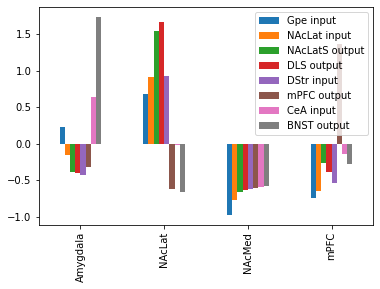

In [184]:
cols = full_zscores_df.sort_values(by=['NAcMed'],axis=1,ascending=True).columns.tolist()[0:8]
full_zscores_df[cols].sort_values(by=['NAcMed'],axis=1,ascending=True).plot.bar()

In [162]:
full_zscores_df.sort_values(by=['mPFC'],axis=1,ascending=False)

,mPFC output,Septum output,DR input,VP input,Septum input,PO input,ZI input,LDT input,EAM input,MHb input,...,DMS output,DLS output,NAcMed input,Cortex input,DStr input,NAcCore input,NAcMedS output,NAcCore output,NAcLat input,Gpe input
Amygdala,-0.318130,-0.348586,0.394468,0.046033,0.092602,0.216195,0.300897,-0.405738,0.244494,-0.141310,...,-0.664162,-0.397530,-0.450142,-0.121482,-0.428103,-0.464508,-0.286847,-0.449747,-0.157146,0.228587
NAcLat,-0.624439,-1.029396,-0.759763,-0.091291,-0.040642,-0.094326,-0.405171,-0.318742,-0.029371,-0.381386,...,1.381071,1.665617,0.348341,0.526437,0.927507,1.128385,-0.906261,0.842129,0.908429,0.679866
NAcMed,-0.613017,0.195495,0.495683,0.401081,-0.047573,0.203878,-0.462926,0.809739,-0.118485,-0.072188,...,-0.195495,-0.629004,0.688141,-0.437424,-0.627168,-0.447674,1.524536,0.329350,-0.766515,-0.971776
mPFC,1.367072,0.906891,0.667990,0.244517,0.197947,0.178540,0.153750,0.092142,0.067090,0.056527,...,-0.378033,-0.385465,-0.415653,-0.476880,-0.539556,-0.545653,-0.570049,-0.643255,-0.643404,-0.741342


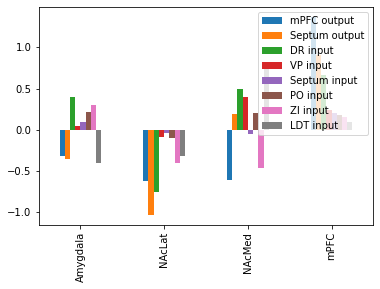

In [74]:
cols = full_zscores_df.sort_values(by=['mPFC'],axis=1,ascending=False).columns.tolist()[0:8]
full_zscores_df[cols].sort_values(by=['mPFC'],axis=1,ascending=False).plot.bar()
plt.savefig('../figures/inputs-outputs.mPFC.'+writebatch+'.svg')

In [163]:
full_zscores_df.sort_values(by=['mPFC'],axis=1,ascending=True)

,Gpe input,NAcLat input,NAcCore output,NAcMedS output,NAcCore input,DStr input,Cortex input,NAcMed input,DLS output,DMS output,...,MHb input,EAM input,LDT input,ZI input,PO input,Septum input,VP input,DR input,Septum output,mPFC output
Amygdala,0.228587,-0.157146,-0.449747,-0.286847,-0.464508,-0.428103,-0.121482,-0.450142,-0.397530,-0.664162,...,-0.141310,0.244494,-0.405738,0.300897,0.216195,0.092602,0.046033,0.394468,-0.348586,-0.318130
NAcLat,0.679866,0.908429,0.842129,-0.906261,1.128385,0.927507,0.526437,0.348341,1.665617,1.381071,...,-0.381386,-0.029371,-0.318742,-0.405171,-0.094326,-0.040642,-0.091291,-0.759763,-1.029396,-0.624439
NAcMed,-0.971776,-0.766515,0.329350,1.524536,-0.447674,-0.627168,-0.437424,0.688141,-0.629004,-0.195495,...,-0.072188,-0.118485,0.809739,-0.462926,0.203878,-0.047573,0.401081,0.495683,0.195495,-0.613017
mPFC,-0.741342,-0.643404,-0.643255,-0.570049,-0.545653,-0.539556,-0.476880,-0.415653,-0.385465,-0.378033,...,0.056527,0.067090,0.092142,0.153750,0.178540,0.197947,0.244517,0.667990,0.906891,1.367072


<AxesSubplot:>

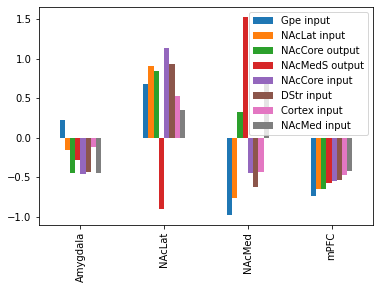

In [186]:
cols = full_zscores_df.sort_values(by=['mPFC'],axis=1,ascending=True).columns.tolist()[0:8]
full_zscores_df[cols].sort_values(by=['mPFC'],axis=1,ascending=True).plot.bar()

In [39]:
full_zscores_df

,Cortex input,NAcMed input,NAcLat input,NAcCore input,DStr input,VP input,PO input,Septum input,BNST input,EAM input,...,mPFC output,NAcMedS output,NAcLatS output,NAcCore output,DMS output,DLS output,VP output,Septum output,BNST output,CeA output
Amygdala,-0.121482,-0.450142,-0.157146,-0.464508,-0.428103,0.046033,0.216195,0.092602,0.811598,0.244494,...,-0.318130,-0.286847,-0.387232,-0.449747,-0.664162,-0.397530,0.235760,-0.348586,1.733560,1.625052
NAcLat,0.526437,0.348341,0.908429,1.128385,0.927507,-0.091291,-0.094326,-0.040642,-0.201408,-0.029371,...,-0.624439,-0.906261,1.542440,0.842129,1.381071,1.665617,-1.000483,-1.029396,-0.655413,-0.572168
NAcMed,-0.437424,0.688141,-0.766515,-0.447674,-0.627168,0.401081,0.203878,-0.047573,0.287252,-0.118485,...,-0.613017,1.524536,-0.659921,0.329350,-0.195495,-0.629004,0.757241,0.195495,-0.579794,-0.570584
mPFC,-0.476880,-0.415653,-0.643404,-0.545653,-0.539556,0.244517,0.178540,0.197947,-0.188151,0.067090,...,1.367072,-0.570049,-0.264245,-0.643255,-0.378033,-0.385465,-0.145463,0.906891,-0.282723,-0.271723


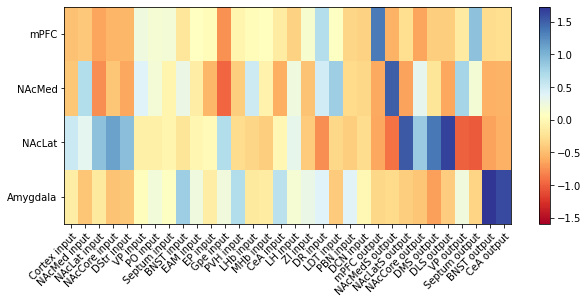

In [70]:
fig,ax =plt.subplots(figsize=(10,4))
plt.pcolor(full_zscores_df, cmap="RdYlBu",vmin=-1.6)

plt.yticks(numpy.arange(0.5, len(full_zscores_df.index), 1), full_zscores_df.index)
plt.xticks(numpy.arange(0.5, len(full_zscores_df.columns), 1), full_zscores_df.columns)
plt.colorbar()
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")
plt.show()
fig.savefig('../figures/inputs-outputs.heatmap.'+writebatch+'.png')
fig.savefig('../figures/inputs-outputs.heatmap.'+writebatch+'.svg')

# Use Line Plot

In [34]:
zscores_lineplot_df = full_zscores_df.transpose().rename_axis("region").rename_axis("projection",axis="columns")
zscores_lineplot_df.head()

projection,Amygdala,NAcLat,NAcMed,mPFC
region,,,,
Cortex input,-0.440586,1.213288,-0.472773,-0.958661
NAcMed input,-1.176161,0.516419,0.465966,-0.623355
NAcLat input,-0.454504,1.508480,-0.921543,-0.820767
NAcCore input,-0.858109,1.316444,-0.605406,-0.901682
DStr input,-0.502558,0.667040,-0.902408,-0.490629


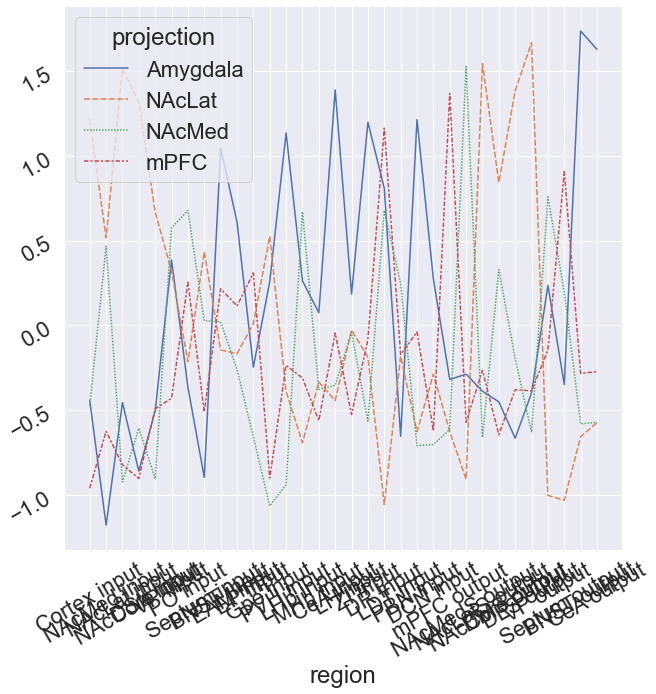

In [150]:
f = plt.figure(figsize=(10,10))
lp = seaborn.lineplot(data=zscores_lineplot_df)
lp.tick_params(rotation=30)

In [35]:
projections = ['NAcMed','NAcLat','mPFC','Amygdala']
regions = zscores_lineplot_df.index.tolist()
projection_groups = projections.copy()
projection_groups.append('none')

In [36]:
top_region = {}
region_ordering = []
for p in projections:
    rs = zscores_lineplot_df.sort_values(by=p,axis=0,ascending=False).index.tolist()
    rs_toiter = rs.copy()
    num_removed = 0
    for i,r in enumerate(rs_toiter):
        max_group = zscores_lineplot_df.loc[r].idxmax()
        if max_group != p:
            rs.remove(r)
    top_region[p] = rs[0]
    region_ordering.extend(rs)

top_region['none']=''

In [37]:
len(regions)

32

In [38]:
len(region_ordering)

32

In [39]:
region_ordering

['NAcMedS output',
 'VP output',
 'PO input',
 'LHb input',
 'VP input',
 'LDT input',
 'DLS output',
 'NAcLatS output',
 'NAcLat input',
 'DMS output',
 'NAcCore input',
 'Cortex input',
 'NAcCore output',
 'DStr input',
 'Gpe input',
 'NAcMed input',
 'Septum input',
 'mPFC output',
 'DR input',
 'Septum output',
 'EP input',
 'BNST output',
 'CeA output',
 'CeA input',
 'PBN input',
 'ZI input',
 'PVH input',
 'BNST input',
 'EAM input',
 'DCN input',
 'LH input',
 'MHb input']

In [40]:
for r in regions:
    if r not in region_ordering:
        if (zscores_lineplot_df.loc[r] > 0.3).any():
            group = zscores_lineplot_df.loc[r].idxmax()
            next_group = projections[projections.index(group)+1]
            idx = region_ordering.index(top_region[next_group])
            region_ordering.insert(idx,r)
        else:
            if top_region['none']=='':
                top_region['none']=r
            region_ordering.append(r)

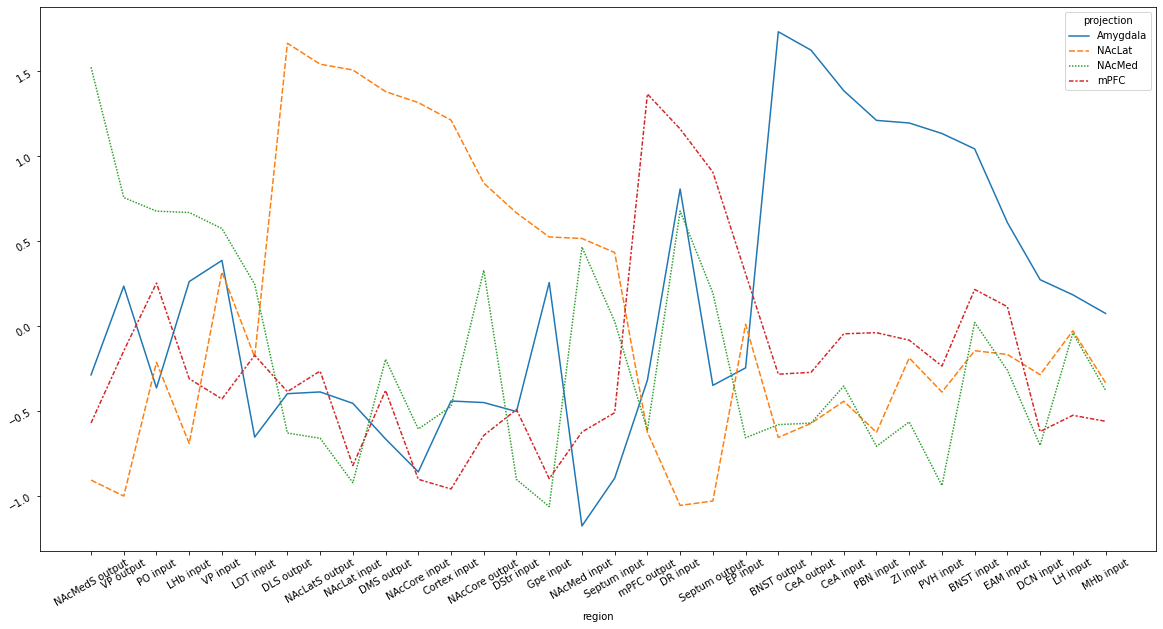

In [41]:
f = plt.figure(figsize=(20,10))
lp = seaborn.lineplot(data=zscores_lineplot_df.loc[region_ordering])
lp.tick_params(rotation=30)

In [42]:
input_columns = input_zscores_df.columns.tolist()[0:-1]
input_region_columns = [f'{f} input' for f in input_columns]
input_columns = input_region_columns.copy()
input_columns.append('projection')

In [43]:
input_zscores_melt_df = pandas.DataFrame(input_zscores_df.values,columns=input_columns)
input_zscores_melt_df = pandas.melt(input_zscores_melt_df.reset_index(),var_name='region',value_vars=input_region_columns,
            value_name='Z-Score',id_vars=['projection'])

In [44]:
output_columns = output_zscores_df.columns.tolist()[0:-1]
output_region_columns = [f'{f} output' for f in output_columns]
output_columns = output_region_columns.copy()
output_columns.append('projection')

In [45]:
output_zscores_melt_df = pandas.DataFrame(output_zscores_df.values,columns=output_columns)
output_zscores_melt_df = pandas.melt(output_zscores_melt_df.reset_index(),var_name='region',value_vars=output_region_columns,
            value_name='Z-Score',id_vars=['projection'])
output_zscores_melt_df = output_zscores_melt_df.replace('Amy','Amygdala')

In [46]:
zscores_melt_df = pandas.concat([input_zscores_melt_df,output_zscores_melt_df]).reset_index(drop=True)
zscores_melt_df['Z-Score'] = zscores_melt_df['Z-Score'].astype(float)
#zscores_melt_df = zscores_melt_df.replace(numpy.nan,"none")

In [47]:
zscores_melt_df.region = pandas.Categorical(zscores_melt_df.region,
                                            categories=region_ordering, ordered=True)

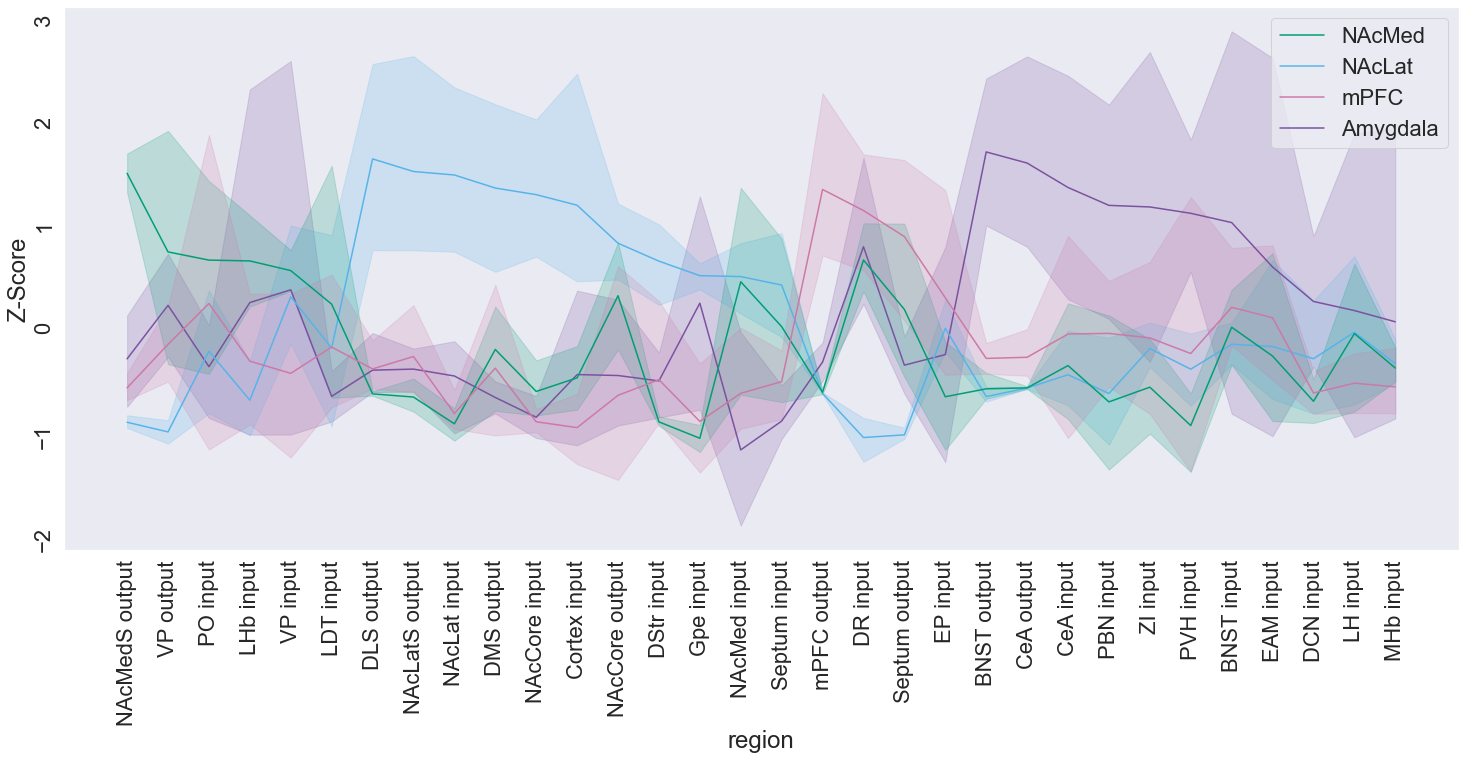

In [52]:
seaborn.set(font_scale=2)
#seaborn.set()
colors = {
    'NAcMed':'#009E73',
    'NAcLat':'#56B4E9',
    'Amygdala':'#7B51A1',
    'mPFC':'#CC79A7',
    #'none specified': 'black'
}

f = plt.figure(figsize=(25,10))
lp = seaborn.lineplot(data=zscores_melt_df,x='region',y='Z-Score',hue='projection',palette=colors)
lp.tick_params(rotation=90)
lp.grid(False)
handles, labels = plt.gca().get_legend_handles_labels()
order = [2,1,3,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])
plt.savefig("../figures/inputs-outputs.zscores.daonly.lineplot."+str(writebatch)+".png")
plt.savefig("../figures/inputs-outputs.zscores.daonly.lineplot."+str(writebatch)+".svg")

In [60]:
nacmed_rs = region_ordering[0:6]

In [82]:
projection_regions = {}
projection_regions['NAcMed'] = region_ordering[0:6]
projection_regions['NAcLat'] = region_ordering[6:17]
projection_regions['mPFC'] = region_ordering[17:21]
projection_regions['Amygdala'] = region_ordering[21:]

In [69]:
from scipy import stats

In [122]:
ps = []
for proj in projections:
    for r in projection_regions[proj]:
        rs = zscores_melt_df[(zscores_melt_df['region']==r)]
        top = rs[(rs['projection']==proj)]['Z-Score'].values
        rest = rs[(rs['projection']!=proj)]['Z-Score'].values
        p=stats.ttest_ind(top,rest)
        print(f"{proj}: {r} - {p[1]}")
        ps.append(p[1])

NAcMed: NAcMedS output - 3.307244155738798e-09
NAcMed: VP output - 0.04925772741441468
NAcMed: PO input - 0.15025326945739104
NAcMed: LHb input - 0.15532542078309639
NAcMed: VP input - 0.22514158510325782
NAcMed: LDT input - 0.60731195686373
NAcLat: DLS output - 7.430859271575637e-07
NAcLat: NAcLatS output - 2.570852122155329e-05
NAcLat: NAcLat input - 0.00029963236648524204
NAcLat: DMS output - 0.0004687289272557362
NAcLat: NAcCore input - 0.002473864133944044
NAcLat: Cortex input - 0.006153882633150213
NAcLat: NAcCore output - 0.060867740755603784
NAcLat: DStr input - 0.15681260781781434
NAcLat: Gpe input - 0.26932531428507434
NAcLat: NAcMed input - 0.27757617739394025
NAcLat: Septum input - 0.3640031190319659
mPFC: mPFC output - 8.86877484576036e-06
mPFC: DR input - 0.009286219044282618
mPFC: Septum output - 0.015112238918106393
mPFC: EP input - 0.5191744281982594
Amygdala: BNST output - 3.349530485074183e-08
Amygdala: CeA output - 2.930500948792504e-06
Amygdala: CeA input - 0.00122

In [99]:
from statsmodels.sandbox.stats.multicomp import multipletests

In [126]:
corrected_ps = multipletests(ps)

In [135]:
pvalues_ar = numpy.zeros((len(region_ordering),4))

In [167]:
pvalues_ar = numpy.empty((len(region_ordering),4),dtype='<U26')
i = 0
for proj in projections:
    for r in projection_regions[proj]:
        p = numpy.format_float_scientific(ps[i],precision=3)
        corr_p = corrected_ps[1][i]
        corr_p = numpy.format_float_scientific(corr_p,precision=3)
        print(f"{proj}: {r} - {p}, {corr_p}")
    
        pvalues_ar[i,:]=numpy.array([proj,r,p,corr_p],dtype = numpy.unicode_)
        i = i+1

NAcMed: NAcMedS output - 3.307e-09, 1.058e-07
NAcMed: VP output - 4.926e-02, 5.312e-01
NAcMed: PO input - 1.503e-01, 8.796e-01
NAcMed: LHb input - 1.553e-01, 8.796e-01
NAcMed: VP input - 2.251e-01, 8.993e-01
NAcMed: LDT input - 6.073e-01, 9.743e-01
NAcLat: DLS output - 7.431e-07, 2.229e-05
NAcLat: NAcLatS output - 2.571e-05, 6.939e-04
NAcLat: NAcLat input - 2.996e-04, 7.761e-03
NAcLat: DMS output - 4.687e-04, 1.165e-02
NAcLat: NAcCore input - 2.474e-03, 5.538e-02
NAcLat: Cortex input - 6.154e-03, 1.27e-01
NAcLat: NAcCore output - 6.087e-02, 5.849e-01
NAcLat: DStr input - 1.568e-01, 8.796e-01
NAcLat: Gpe input - 2.693e-01, 9.188e-01
NAcLat: NAcMed input - 2.776e-01, 9.188e-01
NAcLat: Septum input - 3.640e-01, 9.338e-01
mPFC: mPFC output - 8.869e-06, 2.483e-04
mPFC: DR input - 9.286e-03, 1.624e-01
mPFC: Septum output - 1.511e-02, 2.281e-01
mPFC: EP input - 5.192e-01, 9.743e-01
Amygdala: BNST output - 3.35e-08, 1.038e-06
Amygdala: CeA output - 2.931e-06, 8.498e-05
Amygdala: CeA input - 1.

In [168]:
pvalues_df = pandas.DataFrame(pvalues_ar,columns=["top","region","p value","corrected p value"])

In [171]:
pvalues_df.to_csv("../data/inputs-ouputs.pvalues."+writebatch+".csv")